# 입력값(perch_full), 출력값( perch_weight)를 이용해서 릿지 최적 알파값을 구하라

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()[:,:2]
print(perch_full)

[[ 8.4   2.11]
 [13.7   3.53]
 [15.    3.82]
 [16.2   4.59]
 [17.4   4.59]
 [18.    5.22]
 [18.7   5.2 ]
 [19.    5.64]
 [19.6   5.14]
 [20.    5.08]
 [21.    5.69]
 [21.    5.92]
 [21.    5.69]
 [21.3   6.38]
 [22.    6.11]
 [22.    5.64]
 [22.    6.11]
 [22.    5.88]
 [22.    5.52]
 [22.5   5.86]
 [22.5   6.79]
 [22.7   5.95]
 [23.    5.22]
 [23.5   6.28]
 [24.    7.29]
 [24.    6.38]
 [24.6   6.73]
 [25.    6.44]
 [25.6   6.56]
 [26.5   7.17]
 [27.3   8.32]
 [27.5   7.17]
 [27.5   7.05]
 [27.5   7.28]
 [28.    7.82]
 [28.7   7.59]
 [30.    7.62]
 [32.8  10.03]
 [34.5  10.26]
 [35.   11.49]
 [36.5  10.88]
 [36.   10.61]
 [37.   10.84]
 [37.   10.57]
 [39.   11.14]
 [39.   11.14]
 [39.   12.43]
 [40.   11.93]
 [40.   11.73]
 [40.   12.38]
 [40.   11.14]
 [42.   12.8 ]
 [43.   11.93]
 [43.   12.51]
 [43.5  12.6 ]
 [44.   12.49]]


In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

# 훈련/ 테스트데이터로 분할

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# StandardScaler으로 전처리 진행하여 train_scaled, test_scaled 생성

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 릿지 rain_scaled, train_target 스코어 내기

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9540081260037763
0.8667780839128573


In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

# Alpha 값 plot하기 [0.001, 0.01, 0.1, 1, 10, 100], train_score.append 생성

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

# Alpha 값 plot하기

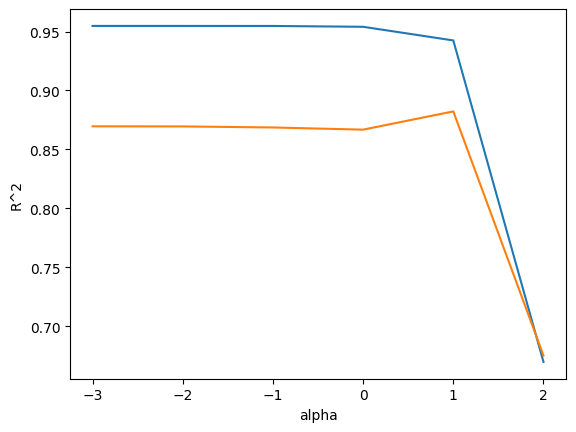

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 최적의 Alpha값을 이용해서 score 계산

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9424368825192823
0.8822551143001546
